              precision    recall  f1-score   support

           0       0.95      0.95      0.95       564
           1       0.18      0.19      0.19        36

    accuracy                           0.90       600
   macro avg       0.57      0.57      0.57       600
weighted avg       0.90      0.90      0.90       600



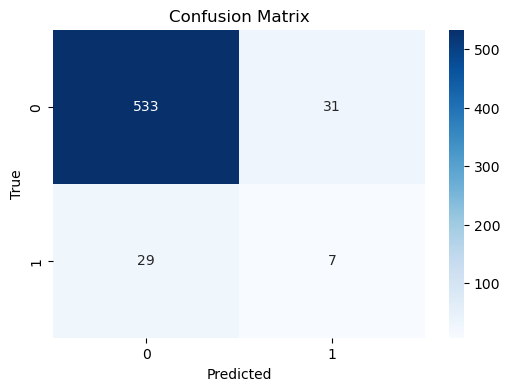

ROC AUC Score: 0.7220252167060678


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(class_weight='balanced', max_depth=6))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# roc_auc score
from sklearn.metrics import roc_auc_score
y_prob = pipeline.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))